In [23]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [24]:
df=pd.read_csv('..\DATASETS\CVD\CDV2.csv')

In [25]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


- `HeartDisease`: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- `BMI`: Body Mass Index (BMI).
- `Smoking`: Have you smoked at least 100 weed in your entire life?
- `AlcoholDrinking`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke`: (Ever told) (you had) a stroke?
- `PhysicalHealth`: (physical illness and injury) For how many days during the past 30 days was your physical health not good? (0-30 days).
-   `MentalHealth`:  For how many days during the past 30 days was your mental health not good? (0-30 days).
-   `DiffWalking`: Do you have serious difficulty walking or climbing stairs?
- `Sex`: Are you male or female?
- `AgeCategory`: Fourteen-level age category. (then calculated the mean)
-   `Race`: Imputed race/ethnicity value.
- `Diabetic`: (Ever told) (you had) diabetes?
- `PhysicalActivity`: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
-   `GenHealth`: Would you say that in general your health is...
-   `SleepTime`: On average, how many hours of sleep do you get in a 24-hour period?
-   `Asthma`: (Ever told) (you had) asthma?
- `KidneyDisease`: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
-   `SkinCancer`: (Ever told) (you had) skin cancer?

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index),
                     values=[x for x in df['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Smoking'].value_counts().index),
                     values=[x for x in df['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['AlcoholDrinking'].value_counts().index),
                     values=[x for x in df['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index),
                     values=[x for x in df['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalking'].value_counts().index),
                     values=[x for x in df['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index),
                     values=[x for x in df['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index),
                     values=[x for x in df['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df['PhysicalActivity'].value_counts().index),
                     values=[x for x in df['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Diabetic'].value_counts().index),
                     values=[x for x in df['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index),
                     values=[x for x in df['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Asthma'].value_counts().index),
                     values=[x for x in df['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df['KidneyDisease'].value_counts().index),
                     values=[x for x in df['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df['SkinCancer'].value_counts().index),
                     values=[x for x in df['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

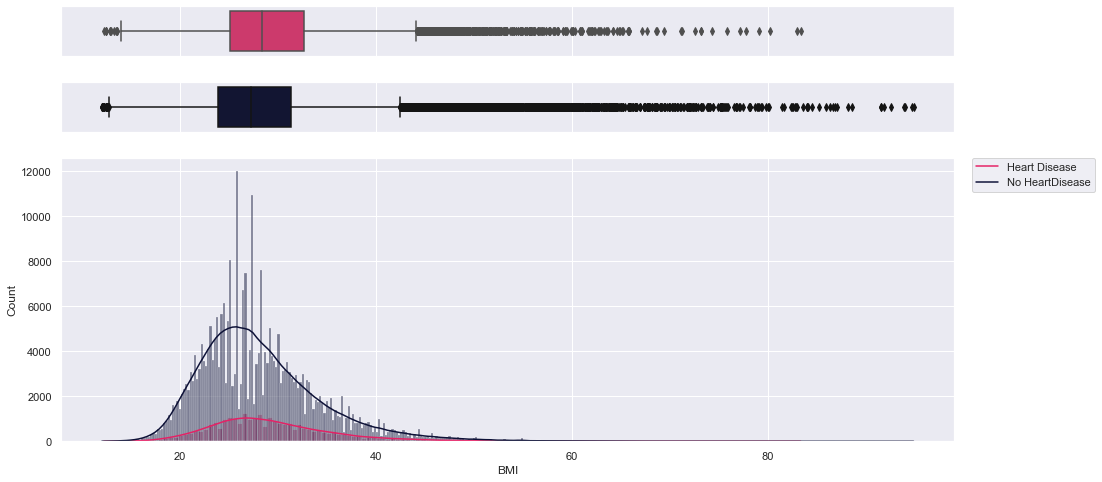

In [31]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#e52165")
sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#e52165")

sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#0d1137')
sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#0d1137')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

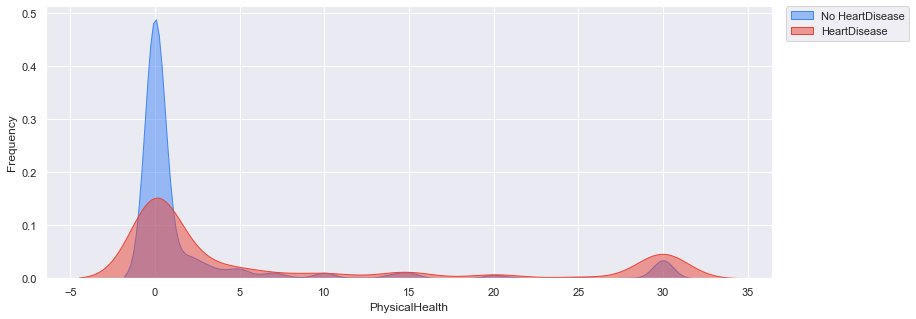

In [22]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

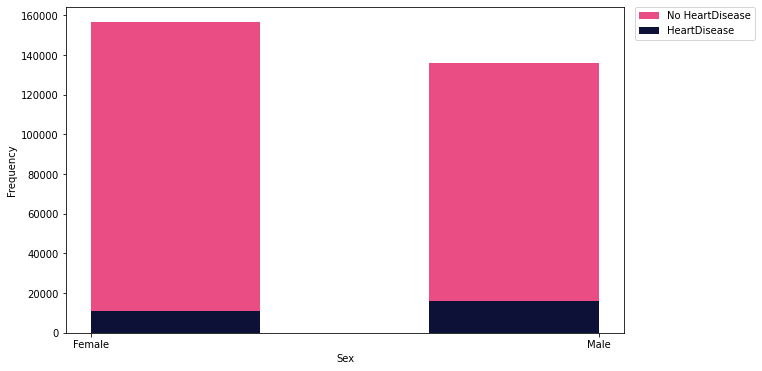

In [30]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#e52165", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#0d1137", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [24]:
female_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Female')])
num_female = len(df[df['Sex']=='Female'])
male_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Male')])
num_male = len(df[df['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738


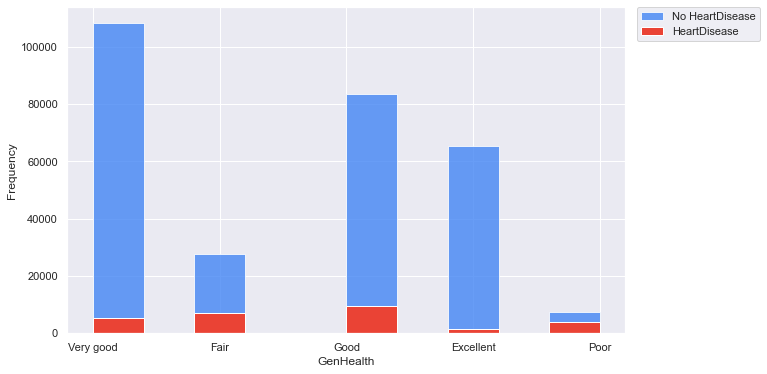

In [25]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

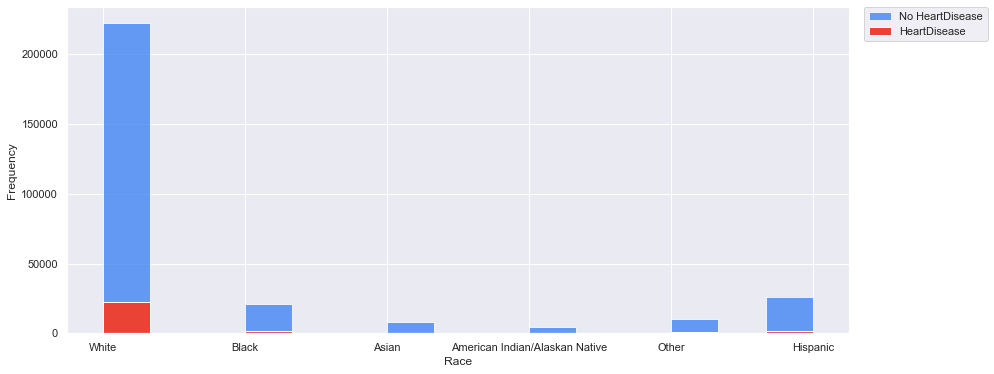

In [26]:
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(df[df["HeartDisease"]=='No']["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

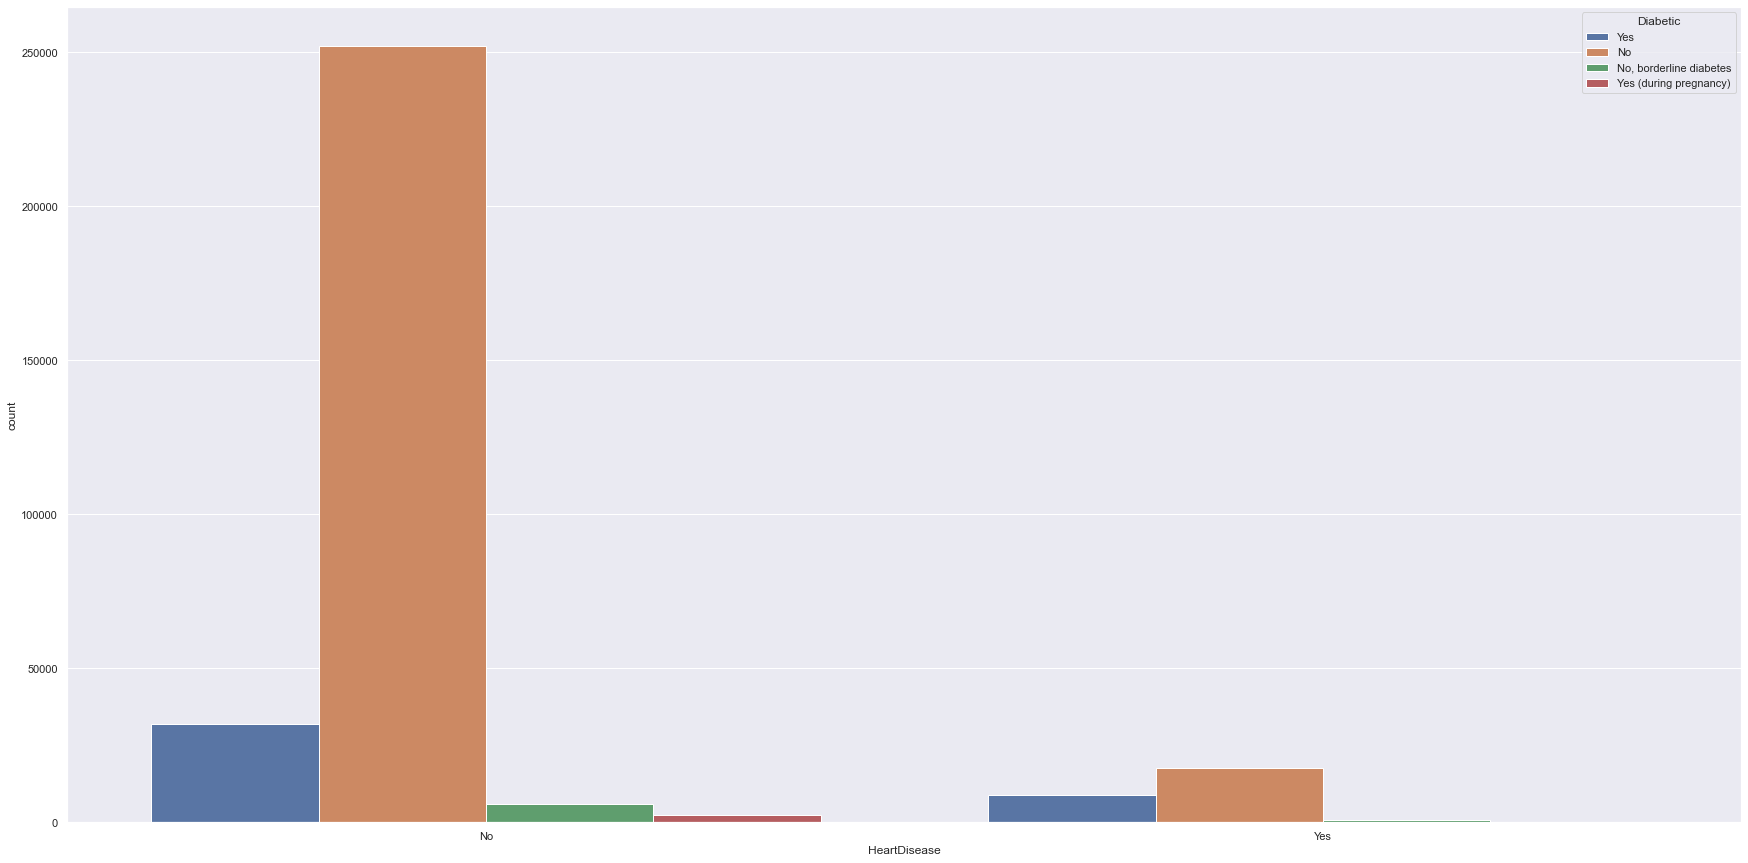

In [35]:
sns.set(rc={'figure.figsize':(30,15)})
# colors = ["#e52165","#0d1137"]
# sns.set_palette(sns.color_palette(colors))
sns.countplot(x="HeartDisease", hue="Diabetic", data=df)

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

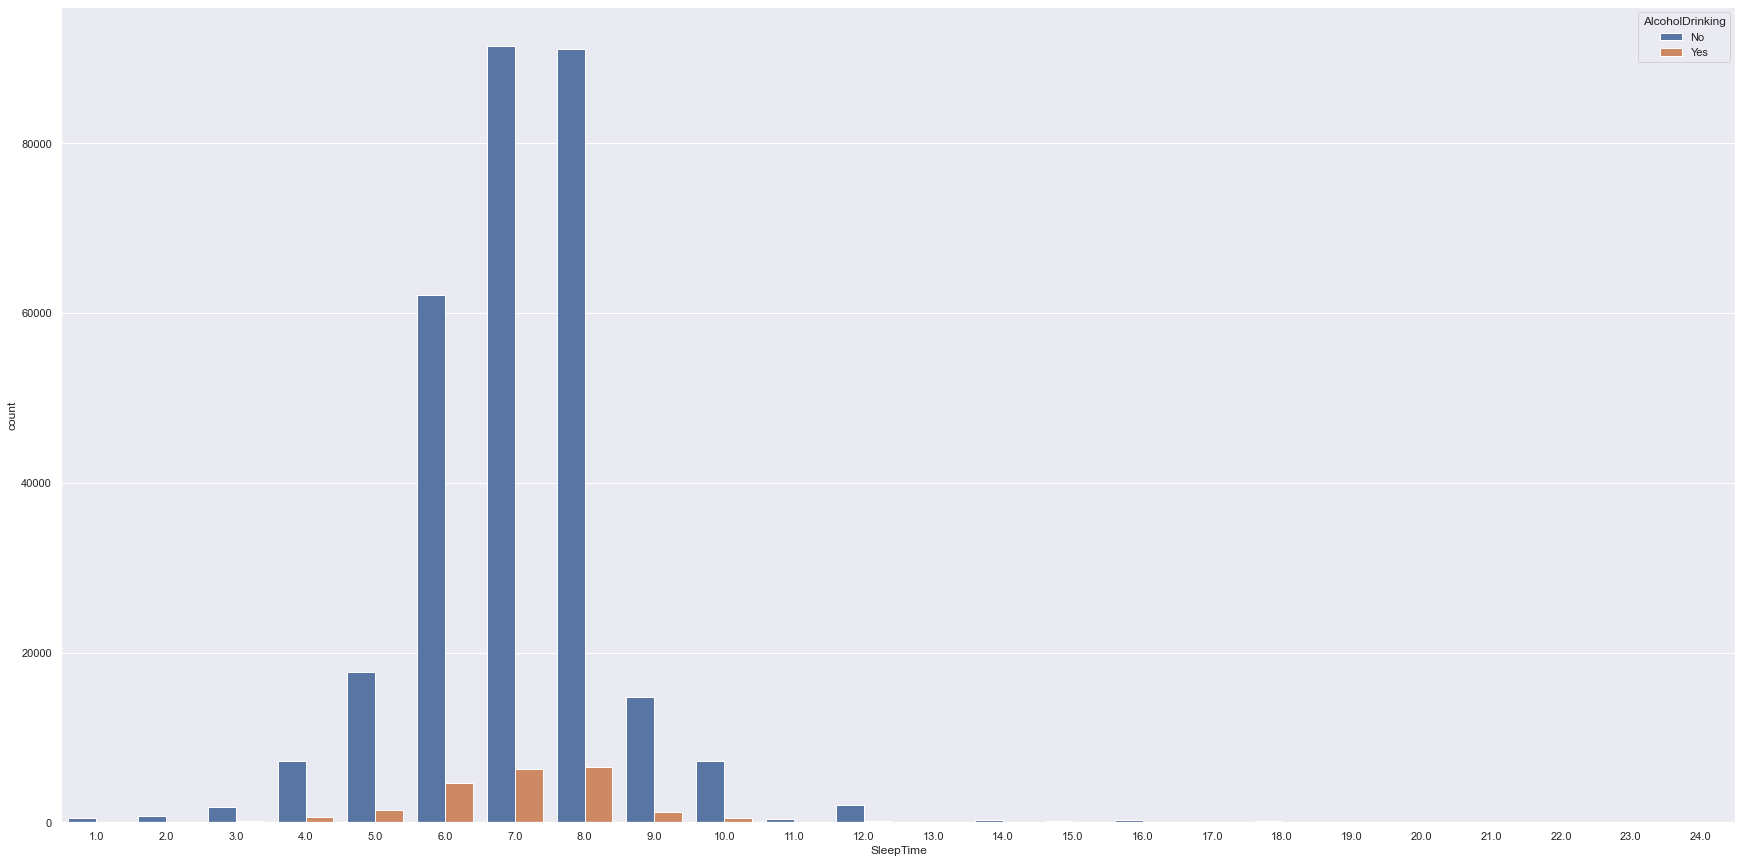

In [12]:
sns.countplot(x="SleepTime", hue="AlcoholDrinking", data=df)

In [6]:
temp=['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
labels=[]
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for item in temp:
    df[item]=le.fit_transform(df[item])
    labels.append(le.classes_)

In [7]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [7]:
labels

[array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
        '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
       dtype=object),
 array(['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
        'Other', 'White'], dtype=object),
 array(['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [8]:
df.to_csv('../FINAL DATASET/CVD/CVD_CDC.csv')

VIZUALIZATION 

In [7]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')